In [4]:
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [5]:
def plot_image(img):
  # Display the images
  fig, ax = plt.subplots(figsize=(10, 10))
  ax.imshow(img)
  ax.axis('off')
  plt.show()

def plot_rgb(img):
  # Display RGB Channels of our image
  fig, axs = plt.subplots(1, 3, figsize=(15, 5))
  axs[0].imshow(img[:,:,0], cmap='Reds')
  axs[1].imshow(img[:,:,1], cmap='Greens')
  axs[2].imshow(img[:,:,2], cmap='Blues')
  axs[0].axis('off')
  axs[1].axis('off')
  axs[2].axis('off')
  axs[0].set_title('Red channel')
  axs[1].set_title('Green channel')
  axs[2].set_title('Blue channel')
  plt.tight_layout()
  plt.show()

def plot_ycbcr(ycbcr_img):
  # Extract and display YCbCr channels
  Y_channel = ycbcr_img[:, :, 0]
  Cb_channel = ycbcr_img[:, :, 1]
  Cr_channel = ycbcr_img[:, :, 2]

  fig, axs = plt.subplots(1, 3, figsize=(15, 5))
  axs[0].imshow(Y_channel, cmap='gray')
  axs[1].imshow(Cb_channel, cmap='YlGnBu')
  axs[2].imshow(Cr_channel, cmap='coolwarm')
  axs[0].axis('off')
  axs[1].axis('off')
  axs[2].axis('off')
  axs[0].set_title('Y (Luminance) Channel')
  axs[1].set_title('Cb (Chrominance) Channel')
  axs[2].set_title('Cr (Chrominance) Channel')
  plt.tight_layout()
  plt.show()

def plot_subsampled_channels(y, cb, cr):
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs[0].imshow(y, cmap='gray')
    axs[0].axis('off')
    axs[0].set_title('Y Channel')
    axs[1].imshow(cb, cmap='coolwarm')
    axs[1].axis('off')
    axs[1].set_title('Subsampled Cb Channel')
    axs[2].imshow(cr, cmap='coolwarm')
    axs[2].axis('off')
    axs[2].set_title('Subsampled Cr Channel')
    plt.tight_layout()
    plt.show()

# Function to convert RGB to YCbCr
def rgb_to_ycbcr(rgb_image):
    transform_matrix = np.array([
        [0.299, 0.587, 0.114],
        [-0.168736, -0.331264, 0.5],
        [0.5, -0.418688, -0.081312]
    ])
    offset = np.array([0, 128, 128])
    ycbcr_image = np.dot(rgb_image, transform_matrix.T) + offset
    return ycbcr_image

# Function to convert YCbCr back to RGB
def ycbcr_to_rgb(ycbcr_image):
    inverse_matrix = np.array([
        [1.0, 0.0, 1.402],
        [1.0, -0.344136, -0.714136],
        [1.0, 1.772, 0.0]
    ])
    offset = np.array([0, 128, 128])
    rgb_image = np.dot(ycbcr_image - offset, inverse_matrix.T)
    rgb_image = np.clip(rgb_image, 0, 255).astype(np.uint8)
    return rgb_image

def chroma_subsampling(ycbcr_image, sampling_format="4:2:0"):
    """
    Apply chroma subsampling to a YCbCr image.
    Supported formats: 4:4:4, 4:2:2, 4:2:0
    """
    y, cb, cr = ycbcr_image[:, :, 0], ycbcr_image[:, :, 1], ycbcr_image[:, :, 2]
    if sampling_format == "4:4:4":
        # No subsampling
        return y, cb, cr
    elif sampling_format == "4:2:2":
        # Horizontal subsampling
        cb = cb[:, ::2]
        cr = cr[:, ::2]
    elif sampling_format == "4:2:0":
        # Horizontal and vertical subsampling
        cb = cb[::2, ::2]
        cr = cr[::2, ::2]
    else:
        raise ValueError("Unsupported sampling format")
    return y, cb, cr

def down_sample(image):
    return image

def up_sample(image):
    return image

In [6]:
files = glob('../inputImages/*')
images = []

for f in range(len(files)):
    images.append(plt.imread(files[f]))
    if images[f].shape[-1] == 4:
        print(files[f], "has 4 channels... Dropping the alpha channel.")
        images[f] = images[f][:, :, :3]  # Keep only RGB channels

print(f'\nSuccessfully loaded', len(files), 'images:')

# print("\n============ IMAGES ============")
for f in range(len(files)):
    print(f'[{f}]:', files[f])

choice = 1

print('\n', files[choice], 'selected.')

../inputImages/google-chrome-icon.png has 4 channels... Dropping the alpha channel.
../inputImages/pixil-frame-0.png has 4 channels... Dropping the alpha channel.
../inputImages/solid-mint.png has 4 channels... Dropping the alpha channel.
../inputImages/teacup.png has 4 channels... Dropping the alpha channel.

Successfully loaded 6 images:
[0]: ../inputImages/google-chrome-icon.png
[1]: ../inputImages/pixil-frame-0.png
[2]: ../inputImages/solid-mint.png
[3]: ../inputImages/lotus.jpg
[4]: ../inputImages/teacup.png
[5]: ../inputImages/sample-nef-files-sample1.nef

 ../inputImages/pixil-frame-0.png selected.



Plotting image and RGB channels...


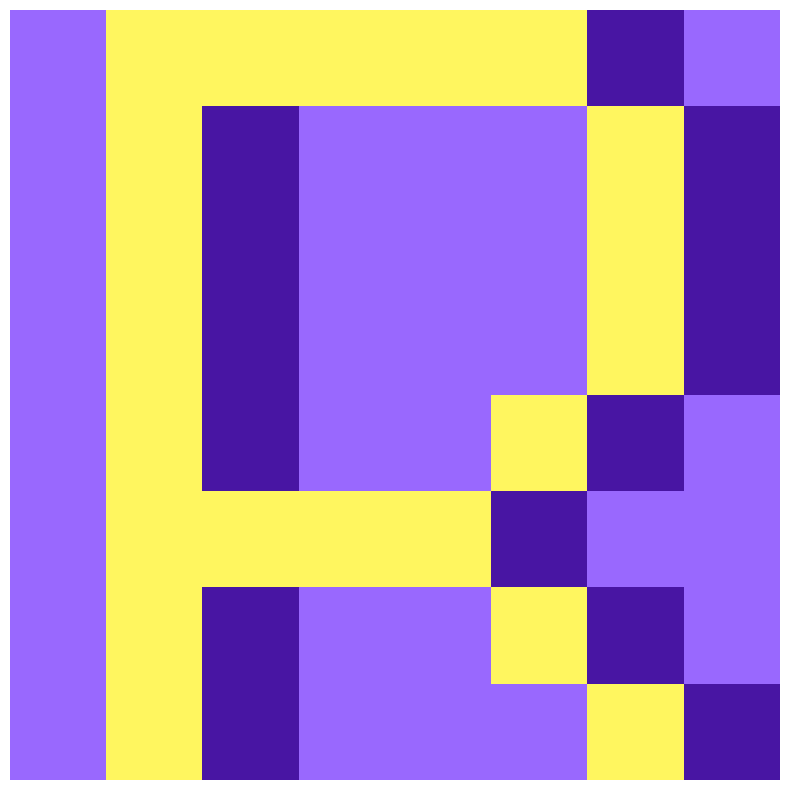

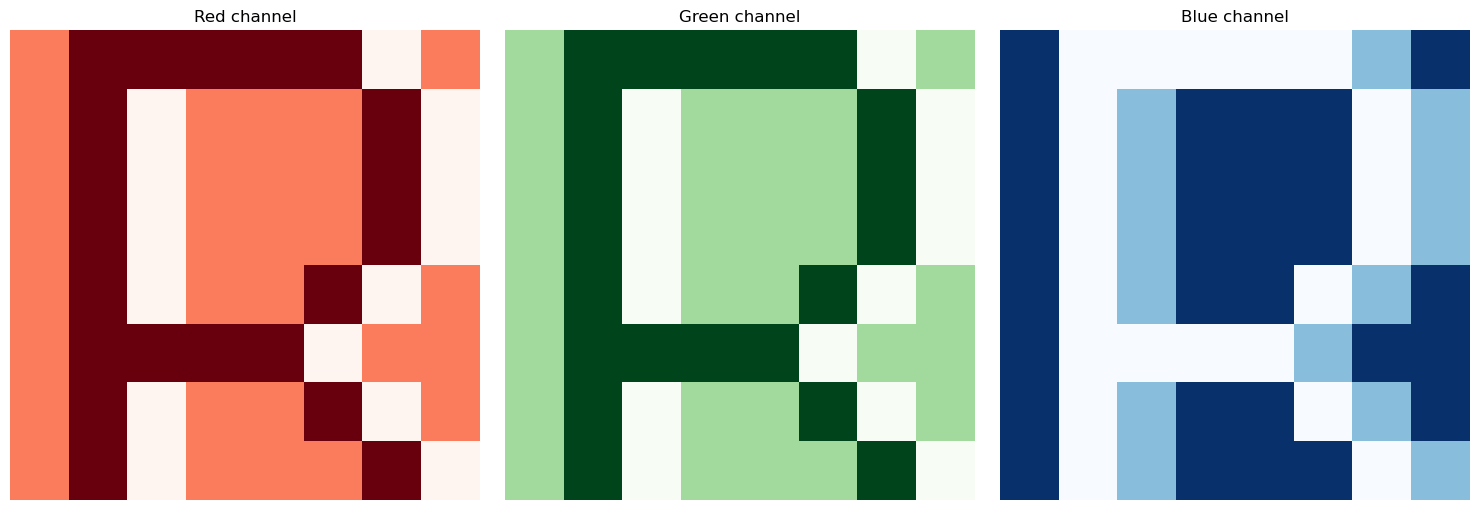

In [7]:
print('\nPlotting image and RGB channels...')
plot_image(images[choice])
plot_rgb(images[choice])

In [8]:
ut.plot_image(rgb_to_ycbcr(images[choice]))
ut.plot_ycbcr(rgb_to_ycbcr(images[choice]))

NameError: name 'ut' is not defined

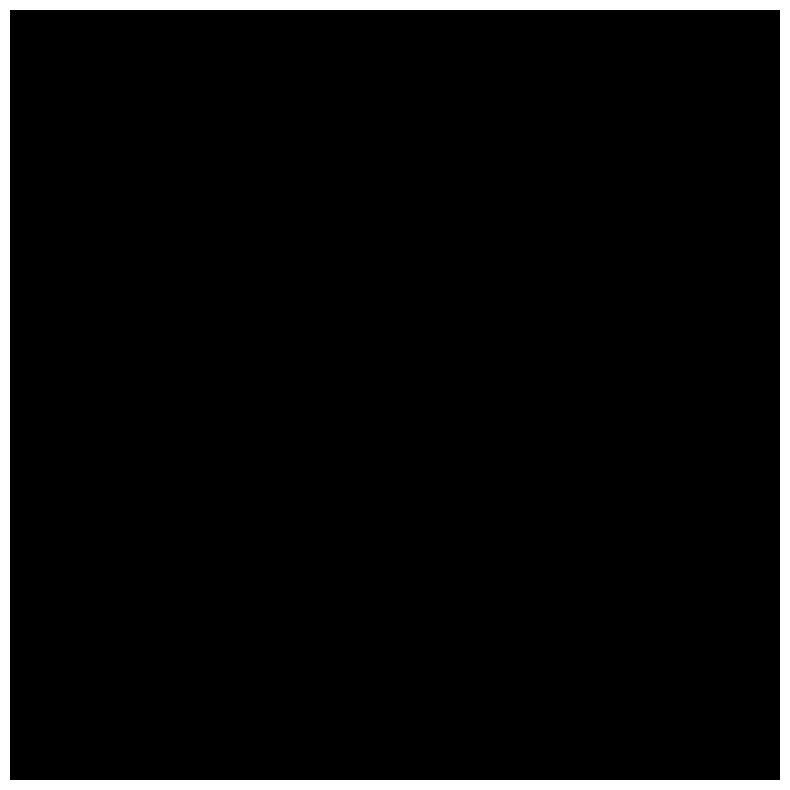

TypeError: only integer scalar arrays can be converted to a scalar index

In [ ]:
from scipy.ndimage import zoom
y, cb, cr = dt.chroma_subsampling(rgb_to_ycbcr(images[choice]), '4:2:0')

cb_upsampled = zoom(cb, (y.shape[0] / cb.shape[0], y.shape[1] / cb.shape[1]), order=1)
cr_upsampled = zoom(cr, (y.shape[0] / cr.shape[0], y.shape[1] / cr.shape[1]), order=1)

# Stack Y, Cb, Cr channels to form the YCbCr image
ycbcr_image = np.stack((y, cb_upsampled, cr_upsampled), axis=-1)

rgb_image = ycbcr_to_rgb(ycbcr_image)

# Plot the reconstructed image
plot_image(rgb_image)
test = np.stack(y, cb, cr)
print(type(test))

ut.plot_subsampled_channels((y, cb, cr), axis=-1)